# Lab 6

You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it. 

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16). 
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [3]:
import random

class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __str__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=1):
        self.cards = []
        suits = ["Hearts", "Diamonds", "Clubs", "Spades"]
        ranks = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "Jack", "Queen", "King", "Ace"]
        for _ in range(num_decks):
            for suit in suits:
                for rank in ranks:
                    self.cards.append(Card(suit, rank))
        random.shuffle(self.cards)
        self.plastic_card_index = random.randint(0, len(self.cards) - 1)

    def shuffle(self):
        random.shuffle(self.cards)
        self.plastic_card_index = random.randint(0, len(self.cards) - 1)

    def draw(self):
        if len(self.cards) == 0:
          print("Reshuffling the deck...")
          self.cards = []
          suits = ["Hearts", "Diamonds", "Clubs", "Spades"]
          ranks = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "Jack", "Queen", "King", "Ace"]
          for _ in range(6):
            for suit in suits:
              for rank in ranks:
                self.cards.append(Card(suit, rank))
          self.shuffle()

        card = self.cards.pop()
        if self.cards and self.plastic_card_index == len(self.cards) :
          self.shuffle()
          self.plastic_card_index = random.randint(0, len(self.cards) - 1)
        return card

2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook. 

3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

In [4]:
class Player:
    def __init__(self, name, chips):
        self.name = name
        self.chips = chips
        self.hand = []  

    def place_bet(self, amount):
        pass  

    def hit(self, card):
        pass  

    def stand(self):
        pass  

    def clear_hand(self):
        pass  

    def get_hand_value(self):
        pass  

class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer", 0)

    def deal_card(self, deck, player):
        pass  

class Hand:
    def __init__(self):
        self.cards = []

    def add_card(self, card):
        pass  

    def get_value(self):
        pass  

    def clear(self):
        pass  

class Game:
    def __init__(self, num_players, num_decks=6):
        self.deck = Deck(num_decks) 
        self.players = []  
        self.dealer = Dealer()

    def start_game(self):
        pass  

    def play_round(self):
        pass  

    def determine_winner(self):
        pass

4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [5]:
class Player:
    def __init__(self, name, chips):
        self.name = name
        self.chips = chips
        self.hand = []

    def place_bet(self, amount, verbose=True):
        if amount <= self.chips:
            self.chips -= amount
            return amount
        else:
            # Print only if verbose is True
            print(f"{self.name} has insufficient chips to bet {amount}.") if verbose else None
            return 0

    def hit(self, card):
        self.hand.append(card)

    def stand(self):
        pass

    def clear_hand(self):
        self.hand = []

    def get_hand_value(self):
        ace_count = 0
        total = 0
        for card in self.hand:
            if card.rank in ('J', 'Q', 'K'):
                total += 10
            elif card.rank == 'A':
                total += 11
                ace_count += 1
            elif card.rank.isdigit():
                total += int(card.rank)

        while total > 21 and ace_count > 0:
            total -= 10
            ace_count -= 1

        return total

class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer", 0)

    def deal_card(self, deck, player, verbose=True):
        card = deck.draw()
        if card:
            player.hand.append(card)
        else:
            # Removed the print statement from `Deck.draw`
            deck.shuffle()
            card = deck.draw()
            player.hand.append(card)

class CountingPlayer(Player):
    def __init__(self, name, chips, threshold=0):
        super().__init__(name, chips)
        self.threshold = threshold
        self.running_count = 0

    def update_count(self, card):
        if card.rank in ('2', '3', '4', '5', '6'):
            self.running_count += 1
        elif card.rank in ('10', 'J', 'Q', 'K', 'A'):
            self.running_count -= 1

    def play(self, game):
        for card in game.dealer.hand + self.hand:
            self.update_count(card)

        while self.get_hand_value() < 21:
            if self.running_count <= self.threshold:
                game.dealer.deal_card(game.deck, self, game.verbose)  # Pass verbose
                self.update_count(self.hand[-1])
                if self.get_hand_value() > 21:
                    if game.verbose:
                        print(f"{self.name} busts!")
                    break
            else:
                break

class Game:
    def __init__(self, num_players, num_decks=6, verbose=True):
        self.deck = Deck(num_decks)
        self.players = []
        self.dealer = Dealer()
        self.verbose = verbose

    def start_game(self):
        self.deck.shuffle()

    def play_round(self):
        bet_amount = 10
        for player in self.players:
            player.place_bet(bet_amount)

        for _ in range(2):
            for player in self.players + [self.dealer]:
                self.dealer.deal_card(self.deck, player, self.verbose)  # Pass verbose

        for player in self.players:
            if isinstance(player, CountingPlayer):
                player.play(self)
            else:
                while player.get_hand_value() < 17:
                    self.dealer.deal_card(self.deck, player, self.verbose)  # Pass verbose
                    if player.get_hand_value() > 21:
                        if self.verbose:
                            print(f"{player.name} busts!")
                        break

        while self.dealer.get_hand_value() < 17:
            self.dealer.deal_card(self.deck, self.dealer, self.verbose)  # Pass verbose
            if self.dealer.get_hand_value() > 21:
                if self.verbose:
                    print("Dealer busts!")
                break

        self.determine_winner()

        for player in self.players + [self.dealer]:
            player.clear_hand()

    def determine_winner(self):
        dealer_value = self.dealer.get_hand_value()
        for player in self.players:
            player_value = player.get_hand_value()

            if self.verbose:
                if player_value > 21:
                    print(f"{player.name} loses (bust).")
                elif dealer_value > 21:
                    print(f"{player.name} wins (dealer bust).")
                    player.chips += 20
                elif player_value > dealer_value:
                    print(f"{player.name} wins.")
                    player.chips += 20
                elif player_value == dealer_value:
                    print(f"{player.name} pushes (tie).")
                    player.chips += 10
                else:
                    print(f"{player.name} loses.")
            else:
                if player_value > 21:
                    pass
                elif dealer_value > 21:
                    player.chips += 20
                elif player_value > dealer_value:
                    player.chips += 20
                elif player_value == dealer_value:
                    player.chips += 10
     

5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [6]:
# Create a game with 3 dealer players
game = Game(num_players=3)

# Add players to the game
game.players.append(Player("Player 1", 100))
game.players.append(Player("Player 2", 100))
game.players.append(Player("Player 3", 100))

# Start the game
game.start_game()

# Play 5 rounds
for _ in range(5):
    game.play_round()
    print("-" * 20)  # Separator between rounds

# Print final chip counts
for player in game.players:
    print(f"{player.name} final chips: {player.chips}")

Player 1 pushes (tie).
Player 2 pushes (tie).
Player 3 wins.
--------------------
Player 1 wins.
Player 2 wins.
Player 3 loses.
--------------------
Player 1 loses.
Player 2 loses.
Player 3 loses.
--------------------
Player 1 wins.
Player 2 wins.
Player 3 pushes (tie).
--------------------
Dealer busts!
Player 1 wins (dealer bust).
Player 2 wins (dealer bust).
Player 3 wins (dealer bust).
--------------------
Player 1 final chips: 120
Player 2 final chips: 120
Player 3 final chips: 100


6. Implement a new player with the following strategy:

    * Assign each card a value: 
        * Cards 2 to 6 are +1 
        * Cards 7 to 9 are 0 
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [7]:
class CountingPlayer(Player):
    def __init__(self, name, chips, threshold=0):
        super().__init__(name, chips)
        self.threshold = threshold  # Threshold for hit/stay decision
        self.running_count = 0  # Keep track of the running count

    def update_count(self, card):
        if card.rank in ('2', '3', '4', '5', '6'):
            self.running_count += 1
        elif card.rank in ('10', 'J', 'Q', 'K', 'A'):
            self.running_count -= 1

    def play(self, game):
        # Update count based on visible cards (dealer's up card + own hand)
        for card in game.dealer.hand + self.hand:
            self.update_count(card)

        while self.get_hand_value() < 21:
            if self.running_count <= self.threshold:
                # Hit if count is below threshold
                game.dealer.deal_card(game.deck, self)
                self.update_count(self.hand[-1])  # Update count for the new card
                if self.get_hand_value() > 21:
                    print(f"{self.name} busts!")
                    break  # Exit loop if busted
            else:
                # Stand if count is above threshold
                break

7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [8]:
# Create a game with 4 players (1 counting player + 3 dealer strategy players)
game = Game(num_players=4)

# Add players to the game
counting_player = CountingPlayer("Counting Player", 100, threshold=-2)  # Using card counting
game.players.append(counting_player)
game.players.extend([Player(f"Player {i}", 100) for i in range(2, 5)])  # 3 dealer strategy players

# Start the game
game.start_game()

# Play 50 rounds or until counting player is out of money
for _ in range(50):
    game.play_round()
    if counting_player.chips <= 0:
        break  # Stop if counting player is out of chips

# Compute and print the strategy player's winnings
winnings = counting_player.chips - 100  # Starting chips were 100
print(f"Counting Player's winnings: {winnings}")

Player 3 busts!
Counting Player loses.
Player 2 wins.
Player 3 loses (bust).
Player 4 wins.
Player 3 busts!
Counting Player loses.
Player 2 wins.
Player 3 loses (bust).
Player 4 wins.
Counting Player loses.
Player 2 loses.
Player 3 pushes (tie).
Player 4 loses.
Player 2 busts!
Player 3 busts!
Player 4 busts!
Counting Player loses.
Player 2 loses (bust).
Player 3 loses (bust).
Player 4 loses (bust).
Dealer busts!
Counting Player wins (dealer bust).
Player 2 wins (dealer bust).
Player 3 wins (dealer bust).
Player 4 wins (dealer bust).
Player 3 busts!
Player 4 busts!
Dealer busts!
Counting Player wins (dealer bust).
Player 2 wins (dealer bust).
Player 3 loses (bust).
Player 4 loses (bust).
Player 3 busts!
Counting Player loses.
Player 2 wins.
Player 3 loses (bust).
Player 4 pushes (tie).
Player 2 busts!
Counting Player loses.
Player 2 loses (bust).
Player 3 wins.
Player 4 wins.
Counting Player loses.
Player 2 wins.
Player 3 loses.
Player 4 wins.
Player 3 busts!
Counting Player loses.
Play

8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


In [9]:
pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.4_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Player 4 has insufficient chips to bet 10.
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Player 4 has insufficient chips to bet 10.
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Player 2 has insufficient chips to bet 10.
Reshuff

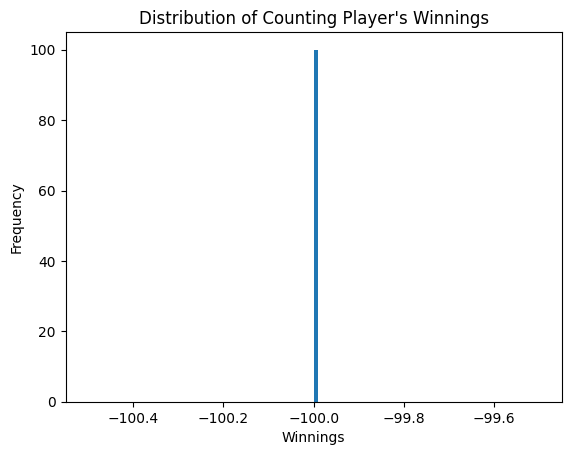

Average winnings per round: -2.00
Standard deviation of winnings: 0.00
Probability of net winning after 50 rounds: 0.00
Probability of net losing after 50 rounds: 1.00


In [10]:
import matplotlib.pyplot as plt
import numpy as np

num_games = 100
num_rounds = 50

winnings_list = []

for _ in range(num_games):
  game = Game(num_players=4, verbose=False)

  counting_player = CountingPlayer("Counting Player", 100, threshold=-2)
  game.players.append(counting_player)
  game.players.extend([Player(f"Player {i}", 100) for i in range(2, 5)])

  game.start_game()

  for _ in range(num_rounds):
    game.play_round()
    if counting_player.chips <= 0:
        break

  winnings = counting_player.chips - 100
  winnings_list.append(winnings)

average_winnings = np.mean(winnings_list)
std_deviation = np.std(winnings_list)
win_probability = np.sum(np.array(winnings_list) > 0) / num_games
loss_probability = np.sum(np.array(winnings_list) < 0) / num_games

plt.hist(winnings_list, bins=100)
plt.xlabel("Winnings")
plt.ylabel("Frequency")
plt.title("Distribution of Counting Player's Winnings")
plt.show()

print(f"Average winnings per round: {average_winnings / num_rounds:.2f}")
print(f"Standard deviation of winnings: {std_deviation:.2f}")
print(f"Probability of net winning after 50 rounds: {win_probability:.2f}")
print(f"Probability of net losing after 50 rounds: {loss_probability:.2f}")

9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Player 4 has insufficient chips to bet 10.
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Player 3 has insufficient chips to bet 10.
Player 3 has insufficient chips to bet 10.
Reshuffling the deck...
Player 3 has insufficient chips to bet 10.
Player 3 has insufficient chips to bet 10.
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the d

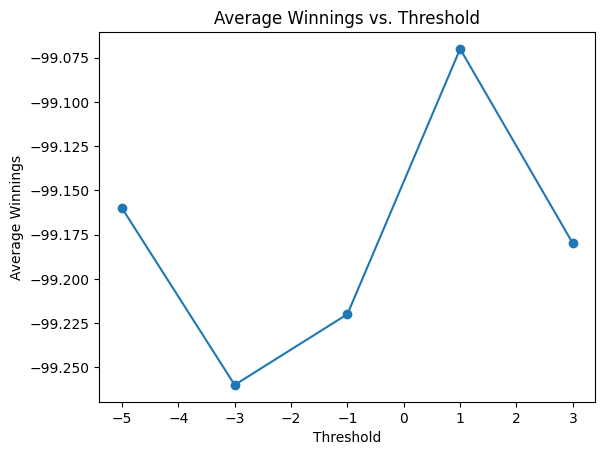

Optimal threshold: 1
Average winnings with optimal threshold: -99.07


In [11]:
import matplotlib.pyplot as plt
import numpy as np

num_games = 1000
num_rounds = 50
thresholds = [-5, -3, -1, 1, 3]  # Different threshold values to test

average_winnings_per_threshold = []

for threshold in thresholds:
    winnings_list = []
    for _ in range(num_games):
        game = Game(num_players=4, verbose=False)

        counting_player = CountingPlayer("Counting Player", 100, threshold=threshold)
        game.players.append(counting_player)
        game.players.extend([Player(f"Player {i}", 100) for i in range(2, 5)])

        game.start_game()

        for _ in range(num_rounds):
            game.play_round()
            if counting_player.chips <= 0:
                break

        winnings = counting_player.chips - 100
        winnings_list.append(winnings)

    average_winnings = np.mean(winnings_list)
    average_winnings_per_threshold.append(average_winnings)

# Find the optimal threshold
optimal_threshold = thresholds[np.argmax(average_winnings_per_threshold)]

# Plot the results
plt.plot(thresholds, average_winnings_per_threshold, marker='o')
plt.xlabel("Threshold")
plt.ylabel("Average Winnings")
plt.title("Average Winnings vs. Threshold")
plt.show()

print(f"Optimal threshold: {optimal_threshold}")
print(f"Average winnings with optimal threshold: {np.max(average_winnings_per_threshold):.2f}")

10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings. 

In [12]:
class Omega2Player(CountingPlayer):
    def __init__(self, name, chips, threshold=0):
        super().__init__(name, chips, threshold)

    def update_count(self, card):
        if card.rank in ('2', '3', '7'):
            self.running_count += 1
        elif card.rank in ('4', '5', '6'):
            self.running_count += 2
        elif card.rank == '9':
            self.running_count += 0  # No change for 9
        elif card.rank in ('10', 'J', 'Q', 'K', 'A'):
            self.running_count -= 2

    def play(self, game):
        # Update count based on visible cards (dealer's up card + own hand)
        for card in game.dealer.hand + self.hand:
            self.update_count(card)

        # Estimate decks remaining (can be refined)
        decks_remaining = len(game.deck.cards) / 52

        # Calculate true count, avoid division by zero
        true_count = self.running_count / decks_remaining if decks_remaining else 0  # Check if decks_remaining is 0

        # Betting strategy (can be adjusted)
        bet_amount = 10 + int(true_count)  # Increase bet with true count

        # Apply basic strategy with deviations (not implemented here)

        # Example: Hit if running count is below threshold
        while self.get_hand_value() < 21:
            if self.running_count <= self.threshold:
                game.dealer.deal_card(game.deck, self)
                self.update_count(self.hand[-1])
                if self.get_hand_value() > 21:
                    print(f"{self.name} busts!")
                    break
            else:
                break

Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the deck...
Reshuffling the 

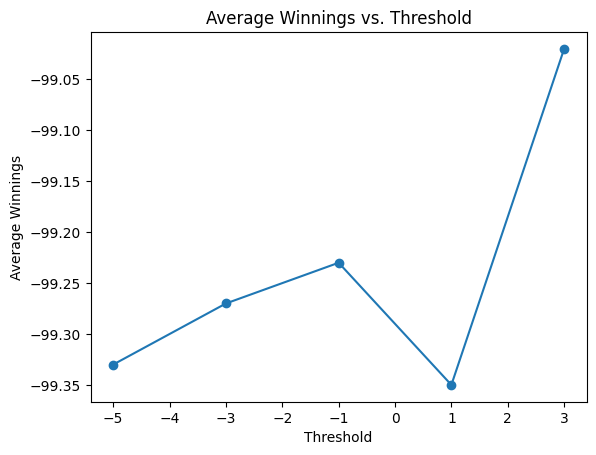

Optimal threshold: 3
Average winnings with optimal threshold: -99.02


In [13]:
import matplotlib.pyplot as plt
import numpy as np

num_games = 1000
num_rounds = 50
thresholds = [-5, -3, -1, 1, 3]  # Different threshold values to test

average_winnings_per_threshold = []

for threshold in thresholds:
    winnings_list = []
    for _ in range(num_games):
        game = Game(num_players=4, verbose=False)

        omega2_player = Omega2Player("Omega2 Player", 100, threshold=threshold)
        game.players.append(omega2_player)
        game.players.extend([Player(f"Player {i}", 100) for i in range(2, 5)])

        game.start_game()

        for _ in range(num_rounds):
            game.play_round()
            if omega2_player.chips <= 0:
                break

        winnings = omega2_player.chips - 100
        winnings_list.append(winnings)

    average_winnings = np.mean(winnings_list)
    average_winnings_per_threshold.append(average_winnings)

# Find the optimal threshold
optimal_threshold = thresholds[np.argmax(average_winnings_per_threshold)]

# Plot the results
plt.plot(thresholds, average_winnings_per_threshold, marker='o')
plt.xlabel("Threshold")
plt.ylabel("Average Winnings")
plt.title("Average Winnings vs. Threshold")
plt.show()

print(f"Optimal threshold: {optimal_threshold}")
print(f"Average winnings with optimal threshold: {np.max(average_winnings_per_threshold):.2f}")